In [274]:
import random
from RedesNueronales.function.generate_data import datos_xor

random.seed(42)

# Datos de entrada y salida

X, y = datos_xor(100,2)

In [275]:
import numpy as np

class PerceptronMultilayer:
    def __init__(self, layer_sizes, funcion_activacion, funcion_derivacion):
        self.z = None
        self.a = None
        self.activacion = funcion_activacion
        self.derivacion = funcion_derivacion
        self.layer_sizes = layer_sizes
        self.weights = []
        self.biases = []
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.uniform(-1,1,(layer_sizes[i], layer_sizes[i+1])))
            self.biases.append(np.random.uniform(layer_sizes[i+1]))

    def forward(self, inputs):
        self.a = [inputs]
        self.z = []
        for i in range(len(self.weights)):
            self.z.append(np.dot(self.a[-1], self.weights[i]) + self.biases[i])
            self.a.append(self.activacion(self.z[-1]))
        return self.a[-1]

    def backpropagation(self, inputs, targets, learning_rate):
        output = self.forward(inputs)
        deltas = [output - targets]
        for i in range(len(self.a) - 2, -1, -1):
            deltas.append(np.dot(deltas[-1], self.weights[i].T) * self.derivacion(self.a[i]))
        deltas.reverse()
        
        for i in range(len(self.weights)):
            self.weights[i] -= np.dot(self.a[i].T, deltas[i+1]) * learning_rate
            self.biases[i] -= np.sum(deltas[i+1]) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                self.backpropagation(inputs[i].reshape(1, -1), targets[i].reshape(-1, 1), learning_rate)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: Error = {np.mean((targets - self.forward(inputs))**2)}')

    def predict(self, inputs):
        return self.forward(inputs)

    def get_weights(self):
        return self.weights

    def get_biases(self):
        return self.biases



In [276]:
def sigmoid( x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
capas =[2,4,1]
model = PerceptronMultilayer(capas, tanh, tanh_derivative)
model.train(X_train,y_train, epochs=10000, learning_rate=0.0001)


Epoch 0: Error = 0.41516154483785866
Epoch 100: Error = 0.2635690324575349
Epoch 200: Error = 0.2476135927625719
Epoch 300: Error = 0.24751727049057695
Epoch 400: Error = 0.24751724232924352
Epoch 500: Error = 0.24751718804696324
Epoch 600: Error = 0.24751710614221573
Epoch 700: Error = 0.2475170229007212
Epoch 800: Error = 0.24751694011325717
Epoch 900: Error = 0.2475168578905653
Epoch 1000: Error = 0.24751677623522014
Epoch 1100: Error = 0.24751669514290364
Epoch 1200: Error = 0.24751661460890254
Epoch 1300: Error = 0.2475165346285243
Epoch 1400: Error = 0.2475164551971237
Epoch 1500: Error = 0.24751637631010318
Epoch 1600: Error = 0.24751629796291322
Epoch 1700: Error = 0.24751622015105101
Epoch 1800: Error = 0.24751614287006035
Epoch 1900: Error = 0.2475160661155308
Epoch 2000: Error = 0.2475159898830971
Epoch 2100: Error = 0.2475159141684389
Epoch 2200: Error = 0.24751583896727986
Epoch 2300: Error = 0.24751576427538738
Epoch 2400: Error = 0.24751569008857174
Epoch 2500: Error = 0

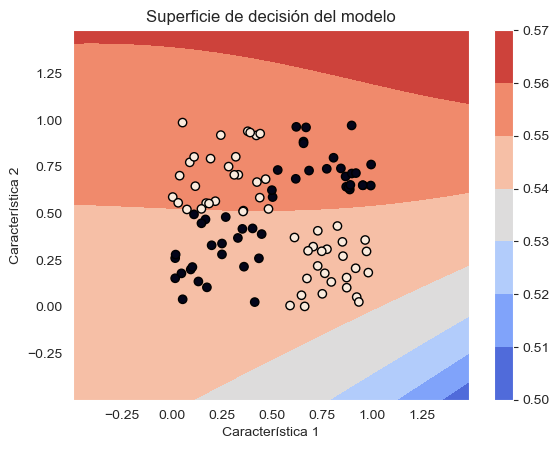

In [282]:
import matplotlib.pyplot as plt

# Crear una cuadrícula de puntos
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01  # paso más pequeño en la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir la función en cada punto de la cuadrícula
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la superficie de decisión
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

# Agregar etiquetas
plt.title('Superficie de decisión del modelo')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Agregar una barra de colores
plt.colorbar(contour)

plt.show()


In [283]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [287]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))  # Capa oculta con 4 nodos
model.add(Dense(1, activation='tanh'))  # Capa de salida con 1 nodo


model.compile(loss='mean_squared_error')

# Entrenar el modelo
salida = model.fit(X_train, y_train, epochs=100, verbose=0)
print(salida)
